# 📊 Code Quality Analysis: Version Evolution

## วิเคราะห์การพัฒนาของแต่ละเวอร์ชัน

Notebook นี้แสดงการวิเคราะห์และเปรียบเทียบคุณภาพโค้ดของแต่ละเวอร์ชัน (v.1 - v.11)

---

## 1. Setup และ Import Libraries

## 3. กราฟคุณภาพโค้ดตามเวอร์ชัน

### 📊 กราฟนี้แสดงอะไร?
กราฟเส้นแสดงการพัฒนาคุณภาพโค้ด (Quality Score) จาก 1-5 ดาว ในแต่ละเวอร์ชัน (v.1 - v.11)

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เห็นภาพรวมการพัฒนา**: ดูได้ทันทีว่าโปรเจกต์พัฒนาขึ้นหรือไม่
- **ระบุเวอร์ชันที่ดีที่สุด**: v.11 ได้ 5 ดาว เป็นเวอร์ชันที่ดีที่สุด
- **เห็นจุดเปลี่ยนสำคัญ**: เช่น v.3 → v.4 มีการกระโดดจาก 3 เป็น 4 ดาว
- **ติดตามความคืบหน้า**: ดูได้ว่าการปรับปรุงแต่ละครั้งส่งผลต่อคุณภาพอย่างไร

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**v.3 (3⭐) - เริ่มมี Docker และ Tests แต่ยังไม่มี Validation:**
```javascript
// v.3/online-shop-inventory/backend/server.js
require("dotenv").config();
const express = require("express");
const cors = require("cors");
const routes = require("./routes");

const app = express();
app.use(cors());
app.use(express.json());

app.get("/health", (req, res) => res.json({ ok: true }));
app.use("/api", routes);
// ❌ ไม่มี input validation
// ❌ Error handling ยังไม่เป็นระบบ
```

**v.4 (4⭐) - เพิ่ม Zod Validation และ Transaction Helper:**
```javascript
// v.4/shopping-cart-app/backend/src/validate.js
import { z } from "zod";

export const addItemSchema = z.object({
  productId: z.number().int().positive(),
  qty: z.number().int().positive().max(999).default(1),
});

// v.4/shopping-cart-app/backend/src/db.js
export async function withTx(fn) {
  const client = await pool.connect();
  try {
    await client.query("BEGIN");
    const result = await fn(client);
    await client.query("COMMIT");
    return result;
  } catch (err) {
    await client.query("ROLLBACK");
    throw err;
  } finally {
    client.release();
  }
}
```

**v.11 (5⭐) - เพิ่ม Repository Pattern และ Error Factory:**
```javascript
// v.11/promotions-app/backend/src/utils/errors.js
const errorFactory = {
  expired: () => new PromotionError('คูปองหมดอายุ', 400, 'expired'),
  minSpend: () => new PromotionError('ยอดซื้อไม่ถึงขั้นต่ำ', 400, 'min_spend_failed'),
  usageLimit: () => new PromotionError('คุณใช้สิทธิ์ครบแล้ว', 400, 'usage_limit'),
};

// v.11/promotions-app/backend/src/services/promotionService.js
async function applyCoupon({ userId, couponCode }) {
  const cart = await cartRepository.getCartByUserId(userId); // Repository pattern
  const coupon = await couponRepository.findByCode(normalizedCode);
  
  validateDateWindow(coupon);
  validateMinimum(cart, coupon);
  await validateUsage(userId, coupon);
  // ... clean business logic
}
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่า style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ตั้งค่า font สำหรับภาษาไทย (ถ้ามี)
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 2. ข้อมูลจาก Code Review

## 4. กราฟ Feature Comparison (Heatmap)

### 📊 กราฟนี้แสดงอะไร?
Heatmap แสดงว่าแต่ละเวอร์ชันมี features อะไรบ้าง โดยใช้สีเขียว = มี (1), สีแดง = ไม่มี (0)

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เปรียบเทียบ features**: ดูได้ทันทีว่าเวอร์ชันไหนมี features อะไรบ้าง
- **ระบุ gaps**: เห็นได้ชัดว่าเวอร์ชันไหนยังขาด features อะไร
- **ติดตามการเพิ่ม features**: ดูได้ว่า features ใหม่ถูกเพิ่มในเวอร์ชันไหน
- **ช่วยตัดสินใจ**: รู้ว่าเวอร์ชันไหนเหมาะกับความต้องการ

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**Validation (Zod) - มีใน v.4, v.10, v.11:**
```javascript
// v.4/shopping-cart-app/backend/src/validate.js
import { z } from "zod";

export const addItemSchema = z.object({
  productId: z.number().int().positive(),
  qty: z.number().int().positive().max(999).default(1),
});

// ใช้ใน route handler
const parsed = addItemSchema.safeParse(body);
if (!parsed.success) {
  return res.status(400).json({ error: "Invalid input", details: parsed.error.flatten() });
}
```

**Row Locking (FOR UPDATE) - มีใน v.4, v.6+:**
```javascript
// v.4/shopping-cart-app/backend/src/cartService.js
export async function addToCart(productId, qty) {
  return withTx(async (client) => {
    // Lock product row to safely check stock
    const productRes = await client.query(
      "SELECT id, stock, price_cents FROM products WHERE id=$1 FOR UPDATE",
      [productId]
    );
    // ... prevents race condition
  });
}

// v.6/inventory-system/backend/app.js
await client.query("BEGIN");
const { rows } = await client.query(
  `SELECT id, stock, low_stock_threshold
   FROM products
   WHERE id = $1
   FOR UPDATE`,
  [productId]
);
// ... atomic transaction
```

**Error Handling Middleware - มีใน v.4, v.8+:**
```javascript
// v.4/shopping-cart-app/backend/src/server.js
app.use((err, req, res, next) => {
  const status = err.status || 500;
  const debug = String(process.env.DEBUG_ERRORS || "false").toLowerCase() === "true";
  const payload = { error: err.message || "Server error" };
  if (debug && err.stack) payload.stack = err.stack;
  res.status(status).json(payload);
});
```

**Repository Pattern - มีเฉพาะ v.11:**
```javascript
// v.11/promotions-app/backend/src/repositories/cartRepository.js
async function getCartByUserId(userId) {
  // Clean data access layer
  const result = await pool.query(
    'SELECT * FROM carts WHERE user_id = $1',
    [userId]
  );
  return result.rows[0];
}
```

In [2]:
# ข้อมูลคุณภาพโค้ด (1-5 ดาว)
data = {
    'version': ['v.1', 'v.2', 'v.3', 'v.4', 'v.5', 'v.6', 'v.7', 'v.8', 'v.9', 'v.10', 'v.11'],
    'quality_score': [0, 2, 3, 4, 3, 4, 3, 4, 4, 4, 5],
    'has_validation': [False, False, False, True, False, False, False, False, False, True, True],
    'has_transactions': [False, False, True, True, True, True, True, True, True, True, True],
    'has_error_handling': [False, False, False, True, False, False, False, True, True, True, True],
    'has_docker': [False, False, True, True, True, True, True, True, True, True, True],
    'has_tests': [False, False, True, True, True, True, False, True, False, True, True],
    'uses_esm': [False, False, False, True, False, False, False, False, False, True, False],
    'uses_typescript': [False, True, False, False, True, False, False, False, False, False, False],
    'uses_zod': [False, False, False, True, False, False, False, False, False, True, True],
    'has_repository_pattern': [False, False, False, False, False, False, False, False, False, False, True],
    'has_service_layer': [False, True, False, True, False, False, False, False, False, False, True],
    'has_row_locking': [False, False, False, True, False, True, True, True, True, True, True],
    'has_money_utils': [False, False, False, True, False, False, True, True, False, True, True],
    'project_name': [
        'Empty',
        'inventory_full_version',
        'online-shop-inventory',
        'shopping-cart-app',
        'promo-shop-plug-and-play',
        'inventory-system',
        'shopping-cart',
        'promotions-discounts-system',
        'inventory-system',
        'shopping-cart-app',
        'promotions-app'
    ]
}

df = pd.DataFrame(data)

# คำนวณ feature score (จำนวน features ที่มี)
feature_cols = ['has_validation', 'has_transactions', 'has_error_handling', 
                'has_docker', 'has_tests', 'uses_zod', 'has_repository_pattern',
                'has_service_layer', 'has_row_locking', 'has_money_utils']
df['feature_count'] = df[feature_cols].sum(axis=1)

print("📊 Data loaded:")
print(df[['version', 'quality_score', 'feature_count', 'project_name']].to_string(index=False))

📊 Data loaded:
version  quality_score  feature_count                project_name
    v.1              0              0                       Empty
    v.2              2              1      inventory_full_version
    v.3              3              3       online-shop-inventory
    v.4              4              9           shopping-cart-app
    v.5              3              3    promo-shop-plug-and-play
    v.6              4              4            inventory-system
    v.7              3              4               shopping-cart
    v.8              4              6 promotions-discounts-system
    v.9              4              4            inventory-system
   v.10              4              8           shopping-cart-app
   v.11              5             10              promotions-app


## 3. กราฟคุณภาพโค้ดตามเวอร์ชัน

## 5. กราฟ Feature Count Trend

### 📊 กราฟนี้แสดงอะไร?
- **กราฟซ้าย**: แท่งกราฟแสดงจำนวน features ที่มีในแต่ละเวอร์ชัน
- **กราฟขวา**: Scatter plot แสดงความสัมพันธ์ระหว่างจำนวน features กับคุณภาพโค้ด

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เห็นความสัมพันธ์**: ตรวจสอบว่า features มากขึ้น = คุณภาพดีขึ้นจริงหรือไม่
- **ระบุเวอร์ชันที่มี features มากที่สุด**: v.11 มี 10 features
- **วิเคราะห์ correlation**: ดูว่าจำนวน features ส่งผลต่อคุณภาพอย่างไร
- **ช่วยวางแผน**: รู้ว่าควรเพิ่ม features อะไรเพื่อยกระดับคุณภาพ

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**v.3 (3 features: Docker, Tests, Transactions):**
```javascript
// v.3 - มี Docker setup แต่ยังไม่มี validation
// docker-compose.yml มีอยู่
// มี tests/inventory.test.js
// มี transactions แบบพื้นฐาน
```

**v.4 (9 features) - กระโดดใหญ่:**
```javascript
// v.4/shopping-cart-app/backend/src/cartService.js
// ✅ Transaction helper
export async function addToCart(productId, qty) {
  return withTx(async (client) => {
    // ✅ Row locking
    const productRes = await client.query(
      "SELECT id, stock, price_cents FROM products WHERE id=$1 FOR UPDATE",
      [productId]
    );
    // ✅ Stock validation
    if (desiredQty > product.stock) {
      const err = new Error(`Not enough stock. Available: ${product.stock}`);
      err.status = 409;
      throw err;
    }
    // ✅ Integer cents math
    return await getCart(client);
  });
}
```

**v.11 (10 features) - มีทุกอย่าง:**
```javascript
// v.11 - มี Repository Pattern เพิ่มเติม
// v.11/promotions-app/backend/src/repositories/couponRepository.js
async function findByCode(code) {
  const result = await pool.query(
    'SELECT * FROM coupons WHERE code = $1',
    [code]
  );
  return result.rows[0];
}

// v.11/promotions-app/backend/src/services/promotionService.js
async function applyCoupon({ userId, couponCode }) {
  // ✅ Repository pattern
  const cart = await cartRepository.getCartByUserId(userId);
  const coupon = await couponRepository.findByCode(normalizedCode);
  
  // ✅ Validation
  validateDateWindow(coupon);
  validateMinimum(cart, coupon);
  
  // ✅ Error factory
  if (!coupon) {
    throw errorFactory.notFound();
  }
}
```

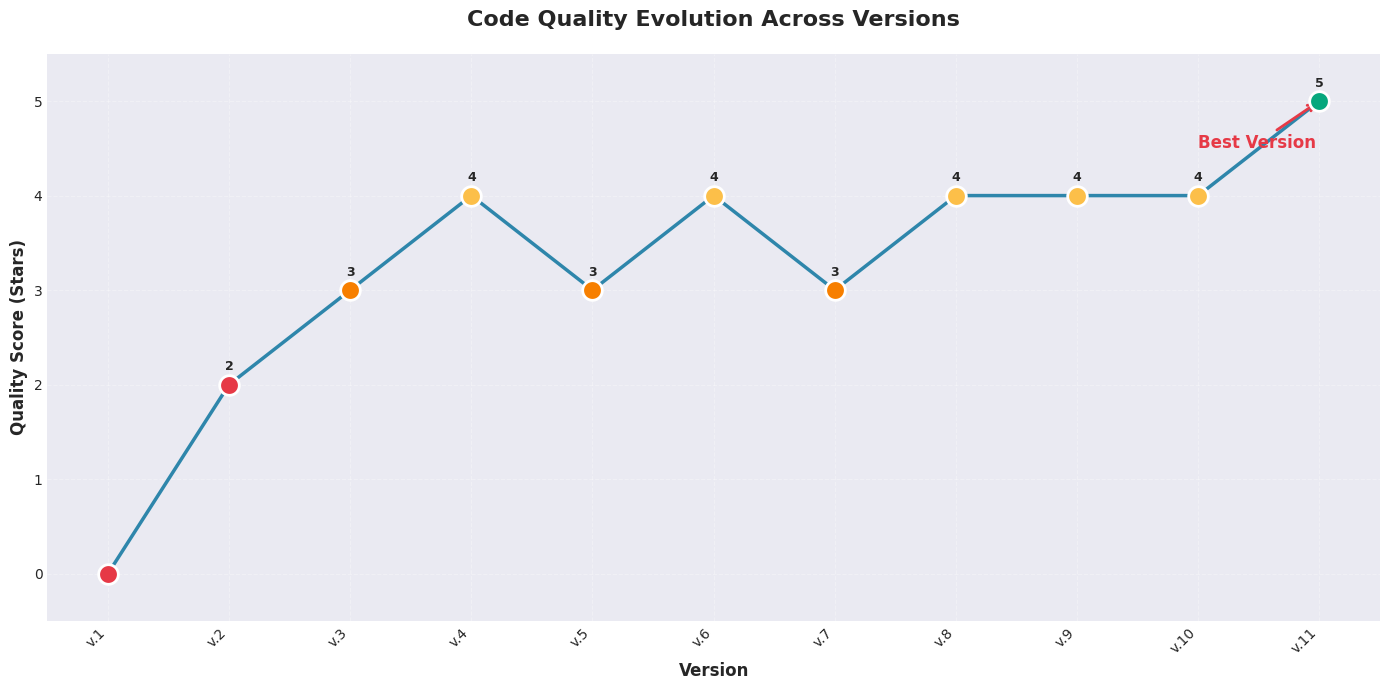


 Summary:
Average Quality Score: 3.60
Best Version: v.11 (5)
Quality Improvement: 3 stars


In [3]:
fig, ax = plt.subplots(figsize=(14, 7))

# สร้างกราฟเส้นแสดงคุณภาพ
ax.plot(df['version'], df['quality_score'], marker='o', linewidth=2.5, markersize=10, 
        color='#2E86AB', label='Code Quality Score', zorder=3)

# สีตามคุณภาพ
colors = ['#E63946' if s <= 2 else '#F77F00' if s == 3 else '#FCBF49' if s == 4 else '#06A77D' 
          for s in df['quality_score']]

# แสดงจุดข้อมูล
for i, (v, score, color) in enumerate(zip(df['version'], df['quality_score'], colors)):
    ax.scatter(v, score, s=200, c=color, edgecolors='white', linewidth=2, zorder=4)
    # เพิ่ม label
    if score > 0:
        ax.text(v, score + 0.15, f'{score}', ha='center', fontsize=9, fontweight='bold')

ax.set_ylim(-0.5, 5.5)
ax.set_xlabel('Version', fontsize=12, fontweight='bold')
ax.set_ylabel('Quality Score (Stars)', fontsize=12, fontweight='bold')
ax.set_title('Code Quality Evolution Across Versions', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xticks(df['version'])
ax.set_xticklabels(df['version'], rotation=45, ha='right')

# เพิ่ม annotation สำหรับเวอร์ชันที่ดีที่สุด
ax.annotate('Best Version', xy=('v.11', 5), xytext=('v.10', 4.5),
            arrowprops=dict(arrowstyle='->', color='#E63946', lw=2),
            fontsize=12, fontweight='bold', color='#E63946')

plt.tight_layout()
plt.show()

print("\n Summary:")
print(f"Average Quality Score: {df[df['quality_score'] > 0]['quality_score'].mean():.2f}")
print(f"Best Version: {df.loc[df['quality_score'].idxmax(), 'version']} ({df['quality_score'].max()})")
print(f"Quality Improvement: {df[df['quality_score'] > 0]['quality_score'].iloc[-1] - df[df['quality_score'] > 0]['quality_score'].iloc[0]} stars")

## 4. กราฟ Feature Comparison (Heatmap)

## 6. กราฟ Architecture Evolution

### 📊 กราฟนี้แสดงอะไร?
กราฟแท่งแสดงการพัฒนาของ architecture patterns ตั้งแต่ Monolithic → Service Layer → Repository Pattern → Clean Architecture

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เห็นวิวัฒนาการ**: ดูได้ว่าสถาปัตยกรรมพัฒนาจากแบบง่ายไปซับซ้อนขึ้นอย่างไร
- **เข้าใจการเปลี่ยนแปลง**: รู้ว่าเวอร์ชันไหนเริ่มใช้ pattern ใหม่
- **เรียนรู้ best practices**: เห็นได้ว่า Clean Architecture (v.11) เป็นจุดหมายปลายทาง
- **ช่วยตัดสินใจ**: รู้ว่าเมื่อไหร่ควร refactor เป็น architecture ที่ดีกว่า

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**v.2-v.3: Monolithic Structure**
```javascript
// v.3/online-shop-inventory/backend/server.js
// ทุกอย่างอยู่ในไฟล์เดียวหรือ routes โดยตรง
app.use("/api", routes);

// routes/inventoryRoutes.js
router.post("/purchase", async (req, res) => {
  // Business logic + DB queries รวมกัน
  const client = await pool.connect();
  const product = await client.query("SELECT * FROM products...");
  // ... logic ทั้งหมดอยู่ที่นี่
});
```

**v.4: Service Layer Separation**
```javascript
// v.4/shopping-cart-app/backend/src/cartService.js
// แยก business logic ออกมา
export async function addToCart(productId, qty) {
  return withTx(async (client) => {
    // Business logic อยู่ที่นี่
    const product = await getProduct(client, productId);
    // ... validation และ logic
    return await getCart(client);
  });
}

// server.js - route handler เรียกใช้ service
app.post("/api/cart/items", async (req, res, next) => {
  try {
    const cart = await addToCart(parsed.data.productId, parsed.data.qty);
    res.json(cart);
  } catch (e) { next(e); }
});
```

**v.11: Repository + Service Pattern (Clean Architecture)**
```javascript
// v.11/promotions-app/backend/src/repositories/cartRepository.js
// Data access layer
async function getCartByUserId(userId) {
  const result = await pool.query(
    'SELECT * FROM carts WHERE user_id = $1',
    [userId]
  );
  return result.rows[0];
}

// v.11/promotions-app/backend/src/services/promotionService.js
// Business logic layer
async function applyCoupon({ userId, couponCode }) {
  // ใช้ repository แทนการ query โดยตรง
  const cart = await cartRepository.getCartByUserId(userId);
  const coupon = await couponRepository.findByCode(normalizedCode);
  
  // Business logic อยู่ที่นี่
  validateDateWindow(coupon);
  validateMinimum(cart, coupon);
  await validateUsage(userId, coupon);
  
  // ... apply discount
}

// v.11/promotions-app/backend/src/controllers/applyCouponController.js
// Controller layer - แค่รับ request และเรียก service
async function applyCoupon(req, res, next) {
  try {
    const result = await promotionService.applyCoupon({
      userId: req.query.userId,
      couponCode: req.body.couponCode
    });
    res.json(result);
  } catch (err) {
    next(err);
  }
}
```

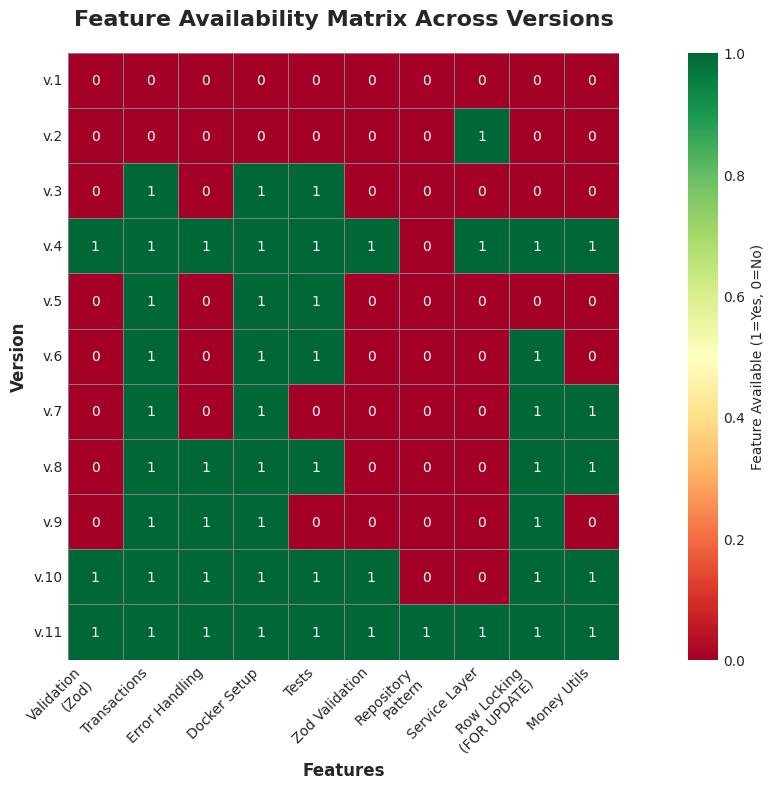

Feature Summary:
Total Features Tracked: 10

Most Feature-Rich Version: v.11 (10 features)
Average Features per Version: 5.2


In [4]:
# เตรียมข้อมูลสำหรับ heatmap
feature_data = df[['version'] + feature_cols].copy()
feature_data = feature_data.set_index('version')

# เปลี่ยนชื่อ columns ให้อ่านง่าย
feature_data.columns = [
    'Validation\n(Zod)',
    'Transactions',
    'Error Handling',
    'Docker Setup',
    'Tests',
    'Zod Validation',
    'Repository\nPattern',
    'Service Layer',
    'Row Locking\n(FOR UPDATE)',
    'Money Utils'
]

# แปลง boolean เป็น int
feature_data = feature_data.astype(int)

# สร้าง heatmap
fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(feature_data, annot=True, fmt='d', cmap='RdYlGn', 
            cbar_kws={'label': 'Feature Available (1=Yes, 0=No)'},
            linewidths=0.5, linecolor='gray', ax=ax,
            vmin=0, vmax=1, square=True)

ax.set_title('Feature Availability Matrix Across Versions', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Version', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Feature Summary:")
print(f"Total Features Tracked: {len(feature_cols)}")
print(f"\nMost Feature-Rich Version: {df.loc[df['feature_count'].idxmax(), 'version']} ({df['feature_count'].max()} features)")
print(f"Average Features per Version: {df[df['quality_score'] > 0]['feature_count'].mean():.1f}")

## 5. กราฟ Feature Count Trend

## 7. กราฟ Tech Stack Features

### 📊 กราฟนี้แสดงอะไร?
กราฟแท่งแสดงการนำ tech stack features ต่างๆ มาใช้ในแต่ละเวอร์ชัน:
- ES Modules (แทน CommonJS)
- TypeScript (type safety)
- Zod Validation (runtime validation)
- Docker (containerization)
- Tests (testing framework)

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **ติดตามการนำเทคโนโลยีมาใช้**: ดูได้ว่าเวอร์ชันไหนเริ่มใช้เทคโนโลยีใหม่
- **เข้าใจการเลือกใช้**: เห็นได้ว่าทำไมบางเวอร์ชันเลือกใช้ ES Modules หรือ TypeScript
- **เปรียบเทียบ**: ดูได้ว่าเวอร์ชันไหนใช้ tech stack ที่ทันสมัยกว่า
- **ช่วยตัดสินใจ**: รู้ว่าเมื่อไหร่ควร migrate ไปใช้เทคโนโลยีใหม่

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**ES Modules (v.4, v.10) - ทันสมัยกว่า CommonJS:**
```javascript
// v.4/shopping-cart-app/backend/package.json
{
  "type": "module"  // ✅ ใช้ ES Modules
}

// v.4/shopping-cart-app/backend/src/server.js
import express from "express";  // ✅ import แทน require
import { pool } from "./db.js";
import { addItemSchema } from "./validate.js";

export { app };  // ✅ export แทน module.exports
```

**TypeScript (v.2, v.5) - Type Safety:**
```typescript
// v.5/promo-shop-plug-and-play/frontend/src/App.tsx
interface Product {
  id: number;
  name: string;
  price: number;
  stock: number;
}

function ProductCard({ product }: { product: Product }) {
  // ✅ Type safety - compiler จะตรวจสอบ types
  return <div>{product.name}</div>;
}
```

**Zod Validation (v.4, v.10, v.11) - Runtime Type Checking:**
```javascript
// v.4/shopping-cart-app/backend/src/validate.js
import { z } from "zod";

export const addItemSchema = z.object({
  productId: z.number().int().positive(),  // ✅ ต้องเป็นจำนวนเต็มบวก
  qty: z.number().int().positive().max(999).default(1),
});

// ใช้ใน route handler
const parsed = addItemSchema.safeParse(body);
if (!parsed.success) {
  return res.status(400).json({ 
    error: "Invalid input", 
    details: parsed.error.flatten() 
  });
}
// ✅ parsed.data มี type ที่ถูกต้อง
```

**Docker (v.3+) - Containerization:**
```yaml
# v.3/online-shop-inventory/docker-compose.yml
version: '3.8'
services:
  db:
    image: postgres:14
    environment:
      POSTGRES_DB: shop
      POSTGRES_USER: shop
      POSTGRES_PASSWORD: shop
  backend:
    build: ./backend
    ports:
      - "3001:3001"
  frontend:
    build: ./frontend
    ports:
      - "5173:5173"
# ✅ One command: docker compose up
```

**Tests (v.3+) - Testing Framework:**
```javascript
// v.3/online-shop-inventory/backend/tests/inventory.test.js
const request = require('supertest');
const app = require('../server');

describe('Inventory API', () => {
  test('should deduct stock on purchase', async () => {
    const res = await request(app)
      .post('/api/purchase')
      .send({ productId: 1, quantity: 2 });
    
    expect(res.status).toBe(200);
    expect(res.body.stock).toBeLessThan(originalStock);
  });
});
```

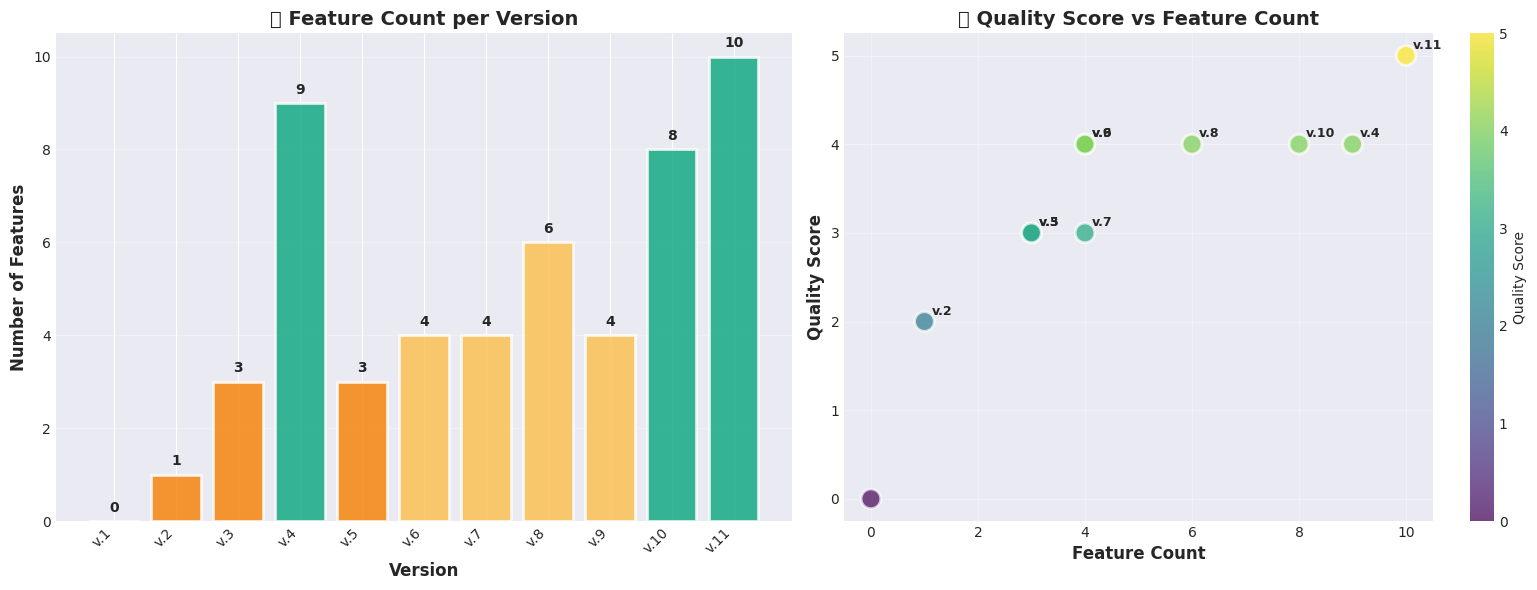


📈 Correlation between Features and Quality: 0.844
   (Higher correlation = more features generally mean better quality)


In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# กราฟที่ 1: Feature Count
ax1.bar(df['version'], df['feature_count'], 
        color=['#E63946' if c == 0 else '#F77F00' if c <= 3 else '#FCBF49' if c <= 6 else '#06A77D' 
               for c in df['feature_count']],
        edgecolor='white', linewidth=2, alpha=0.8)

ax1.set_xlabel('Version', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Features', fontsize=12, fontweight='bold')
ax1.set_title('📦 Feature Count per Version', fontsize=14, fontweight='bold')
ax1.set_xticklabels(df['version'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# เพิ่มค่า label บนแท่ง
for i, v in enumerate(df['version']):
    height = df['feature_count'].iloc[i]
    ax1.text(v, height + 0.2, str(int(height)), ha='center', fontweight='bold')

# กราฟที่ 2: Quality Score vs Feature Count
scatter = ax2.scatter(df['feature_count'], df['quality_score'], 
                     s=200, c=df['quality_score'], cmap='viridis',
                     edgecolors='white', linewidth=2, alpha=0.7, zorder=3)

# เพิ่ม label สำหรับแต่ละเวอร์ชัน
for i, row in df.iterrows():
    if row['quality_score'] > 0:
        ax2.annotate(row['version'], 
                    (row['feature_count'], row['quality_score']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, fontweight='bold')

ax2.set_xlabel('Feature Count', fontsize=12, fontweight='bold')
ax2.set_ylabel('Quality Score', fontsize=12, fontweight='bold')
ax2.set_title('📊 Quality Score vs Feature Count', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Quality Score')

plt.tight_layout()
plt.show()

# คำนวณ correlation
correlation = df[df['quality_score'] > 0][['feature_count', 'quality_score']].corr().iloc[0, 1]
print(f"\n📈 Correlation between Features and Quality: {correlation:.3f}")
print("   (Higher correlation = more features generally mean better quality)")

## 6. กราฟ Architecture Evolution

## 8. กราฟ Radar Chart - เปรียบเทียบเวอร์ชันสำคัญ

### 📊 กราฟนี้แสดงอะไร?
Radar Chart (Spider Chart) เปรียบเทียบเวอร์ชันสำคัญ (v.3, v.4, v.6, v.11) ใน 8 มิติ:
- Quality (คุณภาพ)
- Validation (การตรวจสอบข้อมูล)
- Transactions (การจัดการ transaction)
- Error Handling (การจัดการ error)
- Architecture (สถาปัตยกรรม)
- Testing (การทดสอบ)
- Docker (containerization)
- Money Utils (เครื่องมือจัดการเงิน)

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เปรียบเทียบหลายมิติพร้อมกัน**: ดูได้ว่าเวอร์ชันไหนดีกว่าในด้านไหนบ้าง
- **เห็นจุดแข็ง-จุดอ่อน**: รู้ว่าเวอร์ชันไหนเก่งด้านไหน
- **ช่วยเลือกเวอร์ชัน**: รู้ว่าเวอร์ชันไหนเหมาะกับความต้องการ
- **เห็นภาพรวม**: เข้าใจได้ทันทีว่าเวอร์ชันไหนครอบคลุมทุกด้าน

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้อง:

**v.3 - เริ่มต้น (3⭐):**
```javascript
// v.3 - มี Docker, Tests, Transactions แต่ยังไม่มี Validation
// docker-compose.yml ✅
// tests/inventory.test.js ✅
// Basic transactions ✅
// ❌ ไม่มี Zod validation
// ❌ Error handling ยังไม่เป็นระบบ
```

**v.4 - กระโดดใหญ่ (4⭐):**
```javascript
// v.4/shopping-cart-app/backend/src/validate.js
import { z } from "zod";
export const addItemSchema = z.object({
  productId: z.number().int().positive(),
  qty: z.number().int().positive().max(999),
});
// ✅ Validation

// v.4/shopping-cart-app/backend/src/cartService.js
export async function addToCart(productId, qty) {
  return withTx(async (client) => {
    const productRes = await client.query(
      "SELECT id, stock, price_cents FROM products WHERE id=$1 FOR UPDATE",
      [productId]
    );
    // ✅ Transactions + Row Locking
    // ✅ Integer cents math
  });
}
// ✅ Service Layer
```

**v.6 - Concurrency Safety (4⭐):**
```javascript
// v.6/inventory-system/backend/app.js
app.post("/api/purchase", async (req, res) => {
  const client = await pool.connect();
  try {
    await client.query("BEGIN");
    
    // ✅ Row locking for concurrency safety
    const { rows } = await client.query(
      `SELECT id, stock, low_stock_threshold
       FROM products
       WHERE id = $1
       FOR UPDATE`,
      [productId]
    );
    
    // ✅ Overselling prevention
    if (quantity > product.stock) {
      await client.query("ROLLBACK");
      return res.status(409).json({ error: "Insufficient stock" });
    }
    
    // ✅ Atomic transaction - stock + log in one transaction
    await client.query(`UPDATE products SET stock = $1 WHERE id = $2`, 
      [remainingStock, productId]);
    await client.query(
      `INSERT INTO inventory_log (product_id, type, quantity, note)
       VALUES ($1, 'SALE', $2, $3)`,
      [productId, quantity, `Purchase deducted ${quantity}`]
    );
    
    // ✅ Low stock alert
    if (remainingStock <= threshold) {
      await client.query(
        `INSERT INTO inventory_log (product_id, type, quantity, note)
         VALUES ($1, 'LOW_STOCK_ALERT', 1, $2)`,
        [productId, `Low stock alert: remaining=${remainingStock}`]
      );
    }
    
    await client.query("COMMIT");
  } catch (err) {
    await client.query("ROLLBACK");
    throw err;
  }
});
```

**v.11 - Best Version (5⭐):**
```javascript
// v.11/promotions-app/backend/src/utils/errors.js
const errorFactory = {
  expired: () => new PromotionError('คูปองหมดอายุ', 400, 'expired'),
  minSpend: () => new PromotionError('ยอดซื้อไม่ถึงขั้นต่ำ', 400, 'min_spend_failed'),
  usageLimit: () => new PromotionError('คุณใช้สิทธิ์ครบแล้ว', 400, 'usage_limit'),
};
// ✅ Error Factory Pattern

// v.11/promotions-app/backend/src/repositories/cartRepository.js
async function getCartByUserId(userId) {
  const result = await pool.query(
    'SELECT * FROM carts WHERE user_id = $1',
    [userId]
  );
  return result.rows[0];
}
// ✅ Repository Pattern

// v.11/promotions-app/backend/src/services/promotionService.js
async function applyCoupon({ userId, couponCode }) {
  const cart = await cartRepository.getCartByUserId(userId);
  const coupon = await couponRepository.findByCode(normalizedCode);
  
  validateDateWindow(coupon);
  validateMinimum(cart, coupon);
  await validateUsage(userId, coupon);
  // ✅ Clean Service Layer
  // ✅ All features combined
}
```

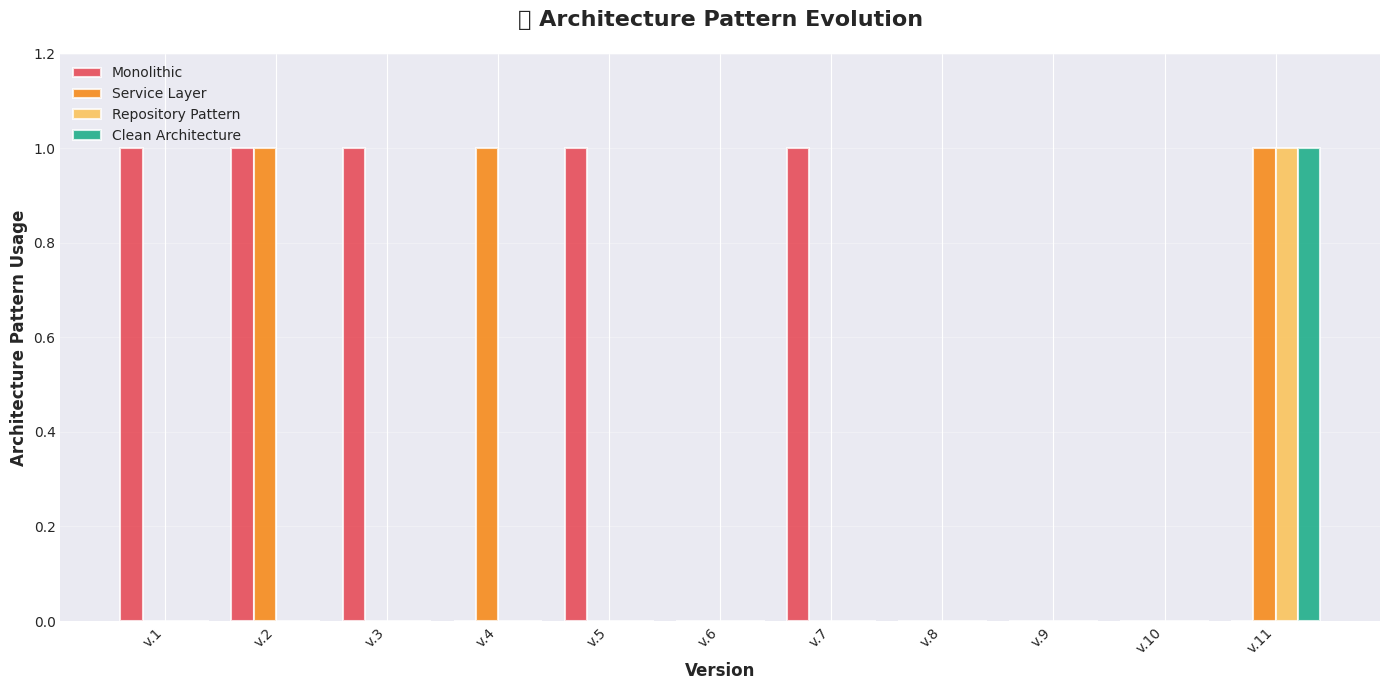


📊 Architecture Evolution Summary:
v.2-v.3: Monolithic structure
v.4: Service layer separation
v.11: Repository + Service pattern (Clean Architecture) 🏆


In [6]:
# ข้อมูล architecture patterns
arch_data = {
    'version': df['version'].tolist(),
    'Monolithic': [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    'Service Layer': [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    'Repository Pattern': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    'Clean Architecture': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
}

arch_df = pd.DataFrame(arch_data)

fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(arch_df['version']))
width = 0.2

patterns = ['Monolithic', 'Service Layer', 'Repository Pattern', 'Clean Architecture']
colors_arch = ['#E63946', '#F77F00', '#FCBF49', '#06A77D']

for i, (pattern, color) in enumerate(zip(patterns, colors_arch)):
    ax.bar(x + i*width, arch_df[pattern], width, label=pattern, 
           color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

ax.set_xlabel('Version', fontsize=12, fontweight='bold')
ax.set_ylabel('Architecture Pattern Usage', fontsize=12, fontweight='bold')
ax.set_title('🏗️ Architecture Pattern Evolution', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(arch_df['version'], rotation=45, ha='right')
ax.legend(loc='upper left', fontsize=10)
ax.set_ylim(0, 1.2)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Architecture Evolution Summary:")
print("v.2-v.3: Monolithic structure")
print("v.4: Service layer separation")
print("v.11: Repository + Service pattern (Clean Architecture) 🏆")

## 7. กราฟ Tech Stack Features

## 9. กราฟ Improvement Timeline

### 📊 กราฟนี้แสดงอะไร?
Timeline แสดงการพัฒนาคุณภาพพร้อม milestones สำคัญที่เกิดขึ้นในแต่ละเวอร์ชัน เช่น:
- v.3: Docker Setup
- v.4: ES Modules + Zod, Row Locking
- v.6: Concurrency Safety
- v.8: Error Middleware
- v.11: Repository Pattern, Clean Architecture

### 🎯 ทำไมต้องแสดงกราฟนี้?
- **เห็นประวัติการพัฒนา**: รู้ว่าแต่ละ milestone เกิดขึ้นเมื่อไหร่
- **เข้าใจการเปลี่ยนแปลง**: เห็นได้ว่าการเปลี่ยนแปลงแต่ละครั้งส่งผลต่อคุณภาพอย่างไร
- **เรียนรู้จากประวัติ**: รู้ว่าอะไรที่ทำให้คุณภาพดีขึ้น
- **วางแผนอนาคต**: รู้ว่าควรทำอะไรต่อไป

### 💡 ตัวอย่างโค้ดที่เกี่ยวข้องกับแต่ละ Milestone:

**Milestone: Docker Setup (v.3)**
```yaml
# v.3/online-shop-inventory/docker-compose.yml
version: '3.8'
services:
  db:
    image: postgres:14
    environment:
      POSTGRES_DB: shop
  backend:
    build: ./backend
    ports:
      - "3001:3001"
  frontend:
    build: ./frontend
    ports:
      - "5173:5173"
# ✅ One command: docker compose up
```

**Milestone: ES Modules + Zod (v.4)**
```javascript
// v.4/shopping-cart-app/backend/package.json
{
  "type": "module"  // ✅ ES Modules
}

// v.4/shopping-cart-app/backend/src/validate.js
import { z } from "zod";  // ✅ Zod validation
export const addItemSchema = z.object({
  productId: z.number().int().positive(),
  qty: z.number().int().positive().max(999),
});
```

**Milestone: Row Locking (v.4)**
```javascript
// v.4/shopping-cart-app/backend/src/cartService.js
export async function addToCart(productId, qty) {
  return withTx(async (client) => {
    // ✅ FOR UPDATE - prevents race condition
    const productRes = await client.query(
      "SELECT id, stock, price_cents FROM products WHERE id=$1 FOR UPDATE",
      [productId]
    );
    
    if (desiredQty > product.stock) {
      const err = new Error(`Not enough stock. Available: ${product.stock}`);
      err.status = 409;
      throw err;
    }
    // ... atomic transaction
  });
}
```

**Milestone: Concurrency Safety (v.6)**
```javascript
// v.6/inventory-system/backend/app.js
app.post("/api/purchase", async (req, res) => {
  const client = await pool.connect();
  try {
    await client.query("BEGIN");
    
    // ✅ Row locking for concurrency
    const { rows } = await client.query(
      `SELECT id, stock, low_stock_threshold
       FROM products
       WHERE id = $1
       FOR UPDATE`,
      [productId]
    );
    
    // ✅ Validate BEFORE write (no overselling)
    if (quantity > product.stock) {
      await client.query("ROLLBACK");
      return res.status(409).json({ error: "Insufficient stock" });
    }
    
    // ✅ Atomic: stock update + log in one transaction
    await client.query(`UPDATE products SET stock = $1 WHERE id = $2`, 
      [remainingStock, productId]);
    await client.query(
      `INSERT INTO inventory_log (product_id, type, quantity, note)
       VALUES ($1, 'SALE', $2, $3)`,
      [productId, quantity, `Purchase deducted ${quantity}`]
    );
    
    await client.query("COMMIT");
  } catch (err) {
    await client.query("ROLLBACK");
    throw err;
  }
});
```

**Milestone: Error Middleware (v.8)**
```javascript
// v.8/promotions-discounts-system/backend/src/middleware/errorHandler.js
function errorHandler(err, req, res, next) {
  console.error(err);
  const status = err.statusCode || 500;
  res.status(status).json({
    error: "INTERNAL_ERROR",
    message: err.message || "Unexpected error",
  });
}
module.exports = { errorHandler };

// v.8/promotions-discounts-system/backend/src/index.js
app.use(errorHandler);  // ✅ Centralized error handling
```

**Milestone: Repository Pattern + Clean Architecture (v.11)**
```javascript
// v.11/promotions-app/backend/src/repositories/cartRepository.js
// ✅ Data Access Layer
async function getCartByUserId(userId) {
  const result = await pool.query(
    'SELECT * FROM carts WHERE user_id = $1',
    [userId]
  );
  return result.rows[0];
}

// v.11/promotions-app/backend/src/services/promotionService.js
// ✅ Business Logic Layer
async function applyCoupon({ userId, couponCode }) {
  const cart = await cartRepository.getCartByUserId(userId);
  const coupon = await couponRepository.findByCode(normalizedCode);
  
  validateDateWindow(coupon);
  validateMinimum(cart, coupon);
  await validateUsage(userId, coupon);
  // ... clean separation of concerns
}

// v.11/promotions-app/backend/src/controllers/applyCouponController.js
// ✅ Presentation Layer
async function applyCoupon(req, res, next) {
  try {
    const result = await promotionService.applyCoupon({
      userId: req.query.userId,
      couponCode: req.body.couponCode
    });
    res.json(result);
  } catch (err) {
    next(err);
  }
}
```

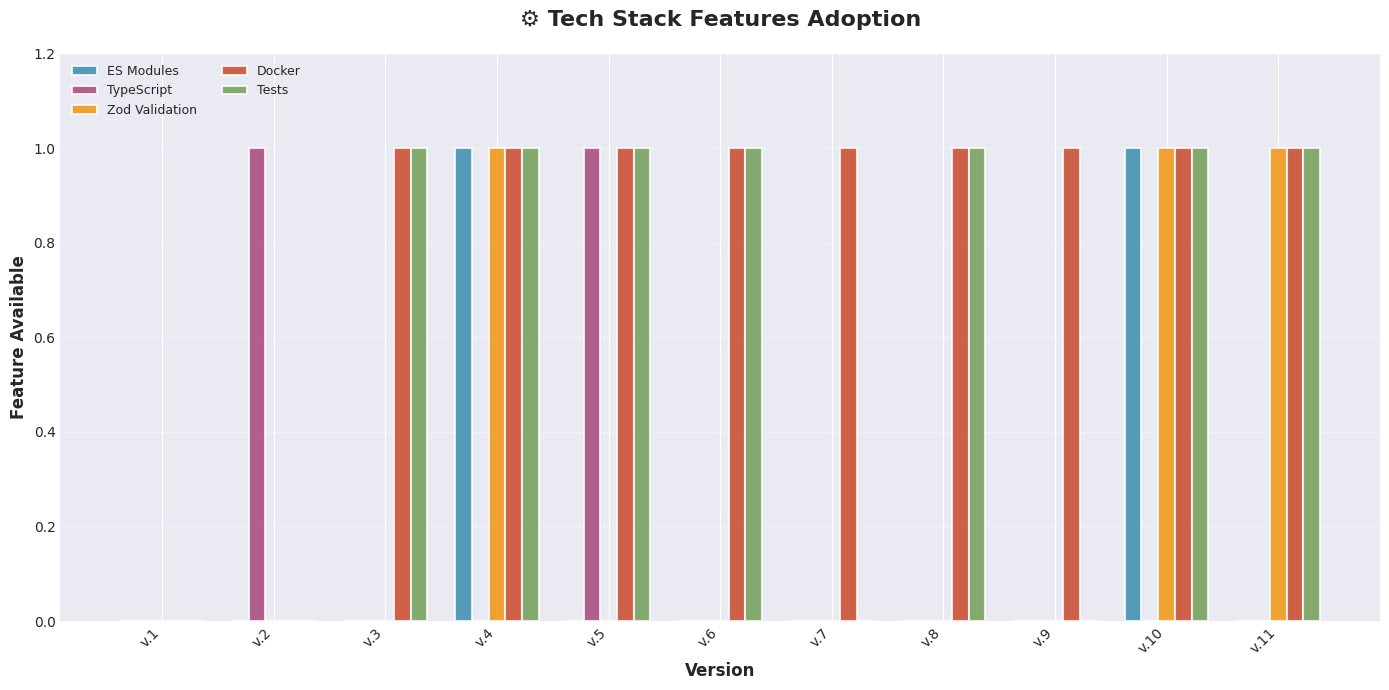


📊 Tech Stack Adoption:
ES Modules: 2 versions (v.4, v.10)
TypeScript: 2 versions (v.2, v.5)
Zod Validation: 3 versions (v.4, v.10, v.11)
Docker: 9 versions (v.3+)
Tests: 7 versions


In [7]:
# ข้อมูล tech stack features
tech_data = {
    'version': df['version'].tolist(),
    'ES Modules': df['uses_esm'].astype(int).tolist(),
    'TypeScript': df['uses_typescript'].astype(int).tolist(),
    'Zod Validation': df['uses_zod'].astype(int).tolist(),
    'Docker': df['has_docker'].astype(int).tolist(),
    'Tests': df['has_tests'].astype(int).tolist()
}

tech_df = pd.DataFrame(tech_data)

fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(tech_df['version']))
width = 0.15

tech_features = ['ES Modules', 'TypeScript', 'Zod Validation', 'Docker', 'Tests']
colors_tech = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

for i, (feature, color) in enumerate(zip(tech_features, colors_tech)):
    ax.bar(x + i*width, tech_df[feature], width, label=feature, 
           color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

ax.set_xlabel('Version', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature Available', fontsize=12, fontweight='bold')
ax.set_title('⚙️ Tech Stack Features Adoption', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(tech_df['version'], rotation=45, ha='right')
ax.legend(loc='upper left', fontsize=9, ncol=2)
ax.set_ylim(0, 1.2)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Tech Stack Adoption:")
print(f"ES Modules: {tech_df['ES Modules'].sum()} versions (v.4, v.10)")
print(f"TypeScript: {tech_df['TypeScript'].sum()} versions (v.2, v.5)")
print(f"Zod Validation: {tech_df['Zod Validation'].sum()} versions (v.4, v.10, v.11)")
print(f"Docker: {tech_df['Docker'].sum()} versions (v.3+)")
print(f"Tests: {tech_df['Tests'].sum()} versions")

## 8. กราฟ Radar Chart - เปรียบเทียบเวอร์ชันสำคัญ

## 10. สรุปและข้อสรุป

### 📊 สรุปการวิเคราะห์

จากการวิเคราะห์กราฟทั้งหมด เราสามารถสรุปได้ว่า:

1. **คุณภาพโค้ดพัฒนาขึ้นอย่างต่อเนื่อง** - จาก v.2 (2⭐) ไปถึง v.11 (5⭐)
2. **Features เพิ่มขึ้นตามเวลา** - v.11 มี features มากที่สุด (10 features)
3. **Architecture พัฒนาจาก Monolithic → Clean Architecture**
4. **Tech Stack ทันสมัยขึ้น** - ES Modules, Zod, TypeScript

### 🎯 Key Takeaways

#### 1. **v.4 เป็นจุดเปลี่ยนสำคัญ**
- เพิ่ม Zod validation
- เพิ่ม ES Modules
- เพิ่ม Row Locking (FOR UPDATE)
- เพิ่ม Transaction Helper
- คุณภาพกระโดดจาก 3⭐ → 4⭐

#### 2. **v.6 เน้น Concurrency Safety**
- ใช้ FOR UPDATE อย่างเข้มงวด
- Atomic transactions
- Overselling prevention
- Low stock alerts

#### 3. **v.11 เป็น Best Practice**
- Repository Pattern
- Service Layer
- Error Factory
- Clean Architecture
- คุณภาพ 5⭐

### 💡 Best Practices ที่เรียนรู้ได้

#### ✅ Validation (Zod)
```javascript
// ✅ Good: v.4, v.10, v.11
import { z } from "zod";
const schema = z.object({
  productId: z.number().int().positive(),
  qty: z.number().int().positive().max(999),
});
const parsed = schema.safeParse(body);
if (!parsed.success) {
  return res.status(400).json({ error: parsed.error.flatten() });
}
```

#### ✅ Transactions (withTx helper)
```javascript
// ✅ Good: v.4
export async function withTx(fn) {
  const client = await pool.connect();
  try {
    await client.query("BEGIN");
    const result = await fn(client);
    await client.query("COMMIT");
    return result;
  } catch (err) {
    await client.query("ROLLBACK");
    throw err;
  } finally {
    client.release();
  }
}
```

#### ✅ Row Locking (FOR UPDATE)
```javascript
// ✅ Good: v.4, v.6+
const productRes = await client.query(
  "SELECT id, stock FROM products WHERE id=$1 FOR UPDATE",
  [productId]
);
// Prevents race condition
```

#### ✅ Error Handling
```javascript
// ✅ Good: v.4, v.8+
app.use((err, req, res, next) => {
  const status = err.status || 500;
  res.status(status).json({ error: err.message || "Server error" });
});

// ✅ Better: v.11 (Error Factory)
const errorFactory = {
  expired: () => new PromotionError('คูปองหมดอายุ', 400, 'expired'),
  minSpend: () => new PromotionError('ยอดซื้อไม่ถึงขั้นต่ำ', 400, 'min_spend_failed'),
};
```

#### ✅ Architecture (Clean Architecture)
```javascript
// ✅ Best: v.11
// Repository Layer (Data Access)
const cart = await cartRepository.getCartByUserId(userId);

// Service Layer (Business Logic)
const result = await promotionService.applyCoupon({ userId, couponCode });

// Controller Layer (Presentation)
app.post('/api/promotions/apply', applyCouponController);
```

### 📈 แนวโน้มการพัฒนา

1. **Type Safety**: ไม่มี → Zod → TypeScript (frontend)
2. **Concurrency**: Basic → FOR UPDATE → Atomic Transactions
3. **Error Handling**: Try-catch → Middleware → Error Factory
4. **Architecture**: Monolithic → Service Layer → Repository Pattern
5. **Money Handling**: Float → Integer Cents → Integer Satang

### 🚀 คำแนะนำสำหรับการพัฒนาต่อ

1. **ใช้ v.11 เป็น reference** - มี architecture ที่ดีที่สุด
2. **เรียนรู้จาก v.4** - เริ่มต้นด้วย ES Modules + Zod + Transactions
3. **ศึกษา v.6** - เข้าใจ concurrency safety
4. **เพิ่ม ES Modules ใน v.11** - ยังใช้ CommonJS อยู่
5. **เพิ่ม Structured Logging** - Winston หรือ Pino

---

*Notebook นี้ช่วยให้เข้าใจการพัฒนาของโปรเจกต์ผ่าน visualization และตัวอย่างโค้ดจริง*

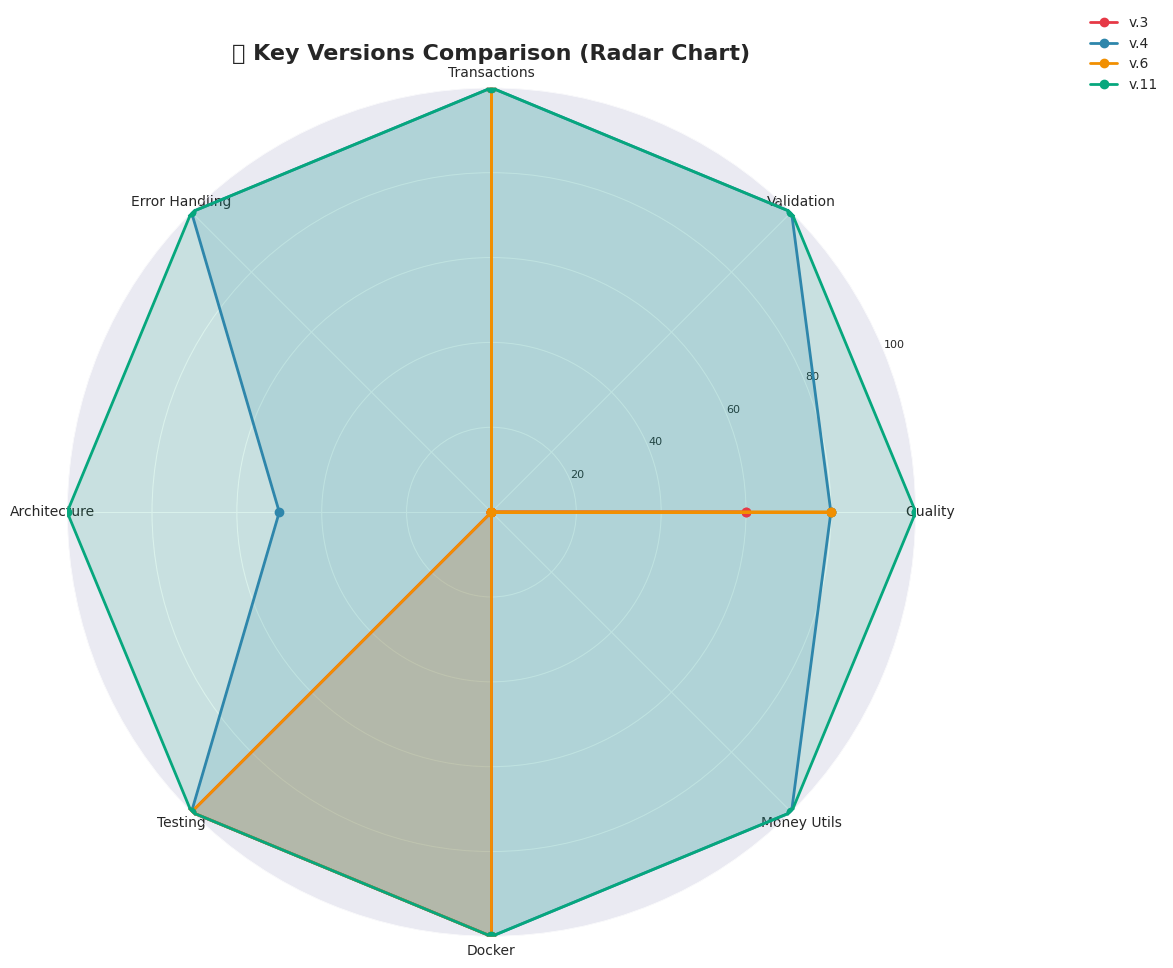


📊 Key Versions Comparison:
v.3: Average Score = 45.0%
v.4: Average Score = 91.2%
v.6: Average Score = 47.5%
v.11: Average Score = 100.0%


In [8]:
from math import pi

# เลือกเวอร์ชันสำคัญมาเปรียบเทียบ
key_versions = ['v.3', 'v.4', 'v.6', 'v.11']
key_df = df[df['version'].isin(key_versions)].copy()

# กำหนด categories
categories = ['Quality', 'Validation', 'Transactions', 'Error Handling', 
              'Architecture', 'Testing', 'Docker', 'Money Utils']

# คำนวณคะแนนสำหรับแต่ละ category
def calculate_scores(row):
    return {
        'Quality': row['quality_score'] / 5.0 * 100,
        'Validation': row['uses_zod'] * 100,
        'Transactions': row['has_transactions'] * 100,
        'Error Handling': row['has_error_handling'] * 100,
        'Architecture': (row['has_repository_pattern'] * 50 + row['has_service_layer'] * 50),
        'Testing': row['has_tests'] * 100,
        'Docker': row['has_docker'] * 100,
        'Money Utils': row['has_money_utils'] * 100
    }

# สร้าง radar chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# จำนวน categories
N = len(categories)

# มุมสำหรับแต่ละ category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # ปิดวงกลม

# สีสำหรับแต่ละเวอร์ชัน
colors = ['#E63946', '#2E86AB', '#F18F01', '#06A77D']

for idx, (_, row) in enumerate(key_df.iterrows()):
    scores = calculate_scores(row)
    values = [scores[cat] for cat in categories]
    values += values[:1]  # ปิดวงกลม
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['version'], color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# ตั้งค่า labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=8)
ax.grid(True)

ax.set_title('🎯 Key Versions Comparison (Radar Chart)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Key Versions Comparison:")
for _, row in key_df.iterrows():
    scores = calculate_scores(row)
    avg_score = sum(scores.values()) / len(scores)
    print(f"{row['version']}: Average Score = {avg_score:.1f}%")

## 9. กราฟ Improvement Timeline

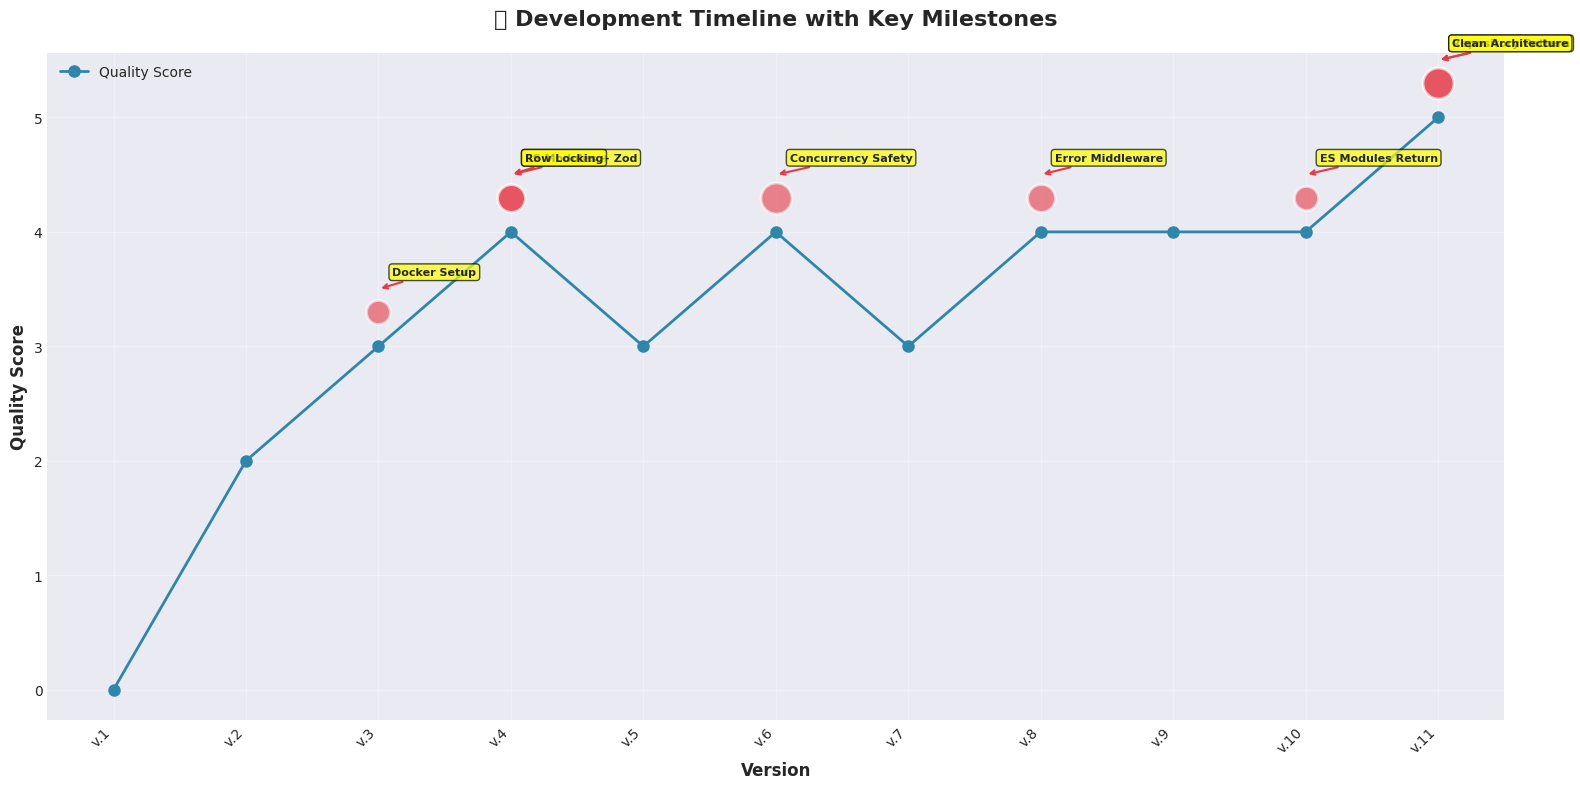


📅 Key Milestones:
  v.3: Docker Setup (⭐⭐⭐)
  v.4: ES Modules + Zod (⭐⭐⭐⭐)
  v.4: Row Locking (⭐⭐⭐⭐)
  v.6: Concurrency Safety (⭐⭐⭐⭐⭐)
  v.8: Error Middleware (⭐⭐⭐⭐)
  v.10: ES Modules Return (⭐⭐⭐)
  v.11: Repository Pattern (⭐⭐⭐⭐⭐)
  v.11: Clean Architecture (⭐⭐⭐⭐⭐)


In [9]:
# ข้อมูล milestones
milestones = [
    {'version': 'v.3', 'milestone': 'Docker Setup', 'importance': 3},
    {'version': 'v.4', 'milestone': 'ES Modules + Zod', 'importance': 4},
    {'version': 'v.4', 'milestone': 'Row Locking', 'importance': 4},
    {'version': 'v.6', 'milestone': 'Concurrency Safety', 'importance': 5},
    {'version': 'v.8', 'milestone': 'Error Middleware', 'importance': 4},
    {'version': 'v.10', 'milestone': 'ES Modules Return', 'importance': 3},
    {'version': 'v.11', 'milestone': 'Repository Pattern', 'importance': 5},
    {'version': 'v.11', 'milestone': 'Clean Architecture', 'importance': 5}
]

milestones_df = pd.DataFrame(milestones)

fig, ax = plt.subplots(figsize=(16, 8))

# สร้าง timeline
version_order = df['version'].tolist()
version_positions = {v: i for i, v in enumerate(version_order)}

# Plot quality score
ax.plot(df['version'], df['quality_score'], 'o-', linewidth=2, markersize=8, 
        color='#2E86AB', label='Quality Score', zorder=1)

# Plot milestones
for _, milestone in milestones_df.iterrows():
    version = milestone['version']
    if version in version_positions:
        x_pos = version_positions[version]
        y_pos = df[df['version'] == version]['quality_score'].values[0]
        
        # ขนาดตาม importance
        size = milestone['importance'] * 100
        
        ax.scatter(version, y_pos + 0.3, s=size, alpha=0.6, 
                  color='#E63946', edgecolors='white', linewidth=2, zorder=2)
        
        # Annotation
        ax.annotate(milestone['milestone'], 
                   (version, y_pos + 0.5),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', color='#E63946', lw=1.5))

ax.set_xlabel('Version', fontsize=12, fontweight='bold')
ax.set_ylabel('Quality Score', fontsize=12, fontweight='bold')
ax.set_title('🚀 Development Timeline with Key Milestones', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(df['version'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\n📅 Key Milestones:")
for _, m in milestones_df.iterrows():
    print(f"  {m['version']}: {m['milestone']} ({'⭐' * m['importance']})")

## 10. สรุปและข้อสรุป

In [10]:
print("=" * 70)
print("📊 CODE QUALITY ANALYSIS SUMMARY")
print("=" * 70)

print("\n🏆 Best Version: v.11")
best = df[df['version'] == 'v.11'].iloc[0]
print(f"   Quality Score: {best['quality_score']}⭐")
print(f"   Features: {best['feature_count']}/{len(feature_cols)}")
print(f"   Project: {best['project_name']}")

print("\n📈 Overall Statistics:")
active_versions = df[df['quality_score'] > 0]
print(f"   Total Versions Analyzed: {len(active_versions)}")
print(f"   Average Quality Score: {active_versions['quality_score'].mean():.2f}⭐")
print(f"   Average Features: {active_versions['feature_count'].mean():.1f}")
print(f"   Quality Improvement: {active_versions['quality_score'].iloc[-1] - active_versions['quality_score'].iloc[0]} stars")

print("\n🎯 Key Improvements:")
print("   1. Architecture: Monolithic → Service Layer → Repository Pattern")
print("   2. Type Safety: No validation → Zod validation")
print("   3. Concurrency: Basic transactions → Row locking (FOR UPDATE)")
print("   4. Error Handling: Basic → Middleware → Error Factory")
print("   5. Money Handling: Float → Integer cents/satang math")

print("\n💡 Recommendations:")
print("   • v.11 is the best reference for Clean Architecture")
print("   • v.4 is good for learning ES Modules + Zod + Transactions")
print("   • v.6 is excellent for understanding concurrency safety")

print("\n" + "=" * 70)
print("✅ Analysis Complete!")
print("=" * 70)

📊 CODE QUALITY ANALYSIS SUMMARY

🏆 Best Version: v.11
   Quality Score: 5⭐
   Features: 10/10
   Project: promotions-app

📈 Overall Statistics:
   Total Versions Analyzed: 10
   Average Quality Score: 3.60⭐
   Average Features: 5.2
   Quality Improvement: 3 stars

🎯 Key Improvements:
   1. Architecture: Monolithic → Service Layer → Repository Pattern
   2. Type Safety: No validation → Zod validation
   3. Concurrency: Basic transactions → Row locking (FOR UPDATE)
   4. Error Handling: Basic → Middleware → Error Factory
   5. Money Handling: Float → Integer cents/satang math

💡 Recommendations:
   • v.11 is the best reference for Clean Architecture
   • v.4 is good for learning ES Modules + Zod + Transactions
   • v.6 is excellent for understanding concurrency safety

✅ Analysis Complete!
